## 1. Import libraries and load the dataset

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [41]:
df = pd.read_csv('./BTC.csv')
df1 = df.reset_index()['Price']

In [42]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

## 2. Split the data into training, test and validate  sets

In [43]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (607, 1)
Validate shape: (203, 1)


In [44]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (204, 1)


In [45]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1214, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [46]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [47]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [48]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

## 3. Perform GRU Model

### 3.1 Build the GRU Model and fit train data into Model

In [49]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
18/18 [==============================] - 4s 85ms/step - loss: 0.0731 - val_loss: 0.0505
Epoch 2/200
18/18 [==============================] - 1s 53ms/step - loss: 0.0131 - val_loss: 0.0095
Epoch 3/200
18/18 [==============================] - 1s 56ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 4/200
18/18 [==============================] - 1s 55ms/step - loss: 0.0016 - val_loss: 3.3023e-04
Epoch 5/200
18/18 [==============================] - 1s 53ms/step - loss: 8.4895e-04 - val_loss: 5.9799e-05
Epoch 6/200
18/18 [==============================] - 1s 51ms/step - loss: 7.9631e-04 - val_loss: 7.2446e-05
Epoch 7/200
18/18 [==============================] - 1s 50ms/step - loss: 7.6426e-04 - val_loss: 1.1149e-04
Epoch 8/200
18/18 [==============================] - 1s 54ms/step - loss: 7.3561e-04 - val_loss: 9.1436e-05
Epoch 9/200
18/18 [==============================] - 1s 55ms/step - loss: 7.1881e-04 - val_loss: 6.8586e-05
Epoch 10/200
18/18 [==============================] - 1s

18/18 [==============================] - 1s 62ms/step - loss: 4.4066e-04 - val_loss: 3.3433e-05
Epoch 77/200
18/18 [==============================] - 1s 64ms/step - loss: 4.4287e-04 - val_loss: 4.3879e-05
Epoch 78/200
18/18 [==============================] - 1s 67ms/step - loss: 4.4820e-04 - val_loss: 3.3181e-05
Epoch 79/200
18/18 [==============================] - 1s 70ms/step - loss: 4.3412e-04 - val_loss: 3.5004e-05
Epoch 80/200
18/18 [==============================] - 1s 64ms/step - loss: 4.2710e-04 - val_loss: 3.5204e-05
Epoch 81/200
18/18 [==============================] - 1s 78ms/step - loss: 4.3965e-04 - val_loss: 4.8029e-05
Epoch 82/200
18/18 [==============================] - 1s 71ms/step - loss: 4.3576e-04 - val_loss: 4.6891e-05
Epoch 83/200
18/18 [==============================] - 1s 73ms/step - loss: 4.3760e-04 - val_loss: 3.5351e-05
Epoch 84/200
18/18 [==============================] - 1s 69ms/step - loss: 4.4213e-04 - val_loss: 3.3269e-05
Epoch 85/200
18/18 [============

Epoch 151/200
18/18 [==============================] - 1s 66ms/step - loss: 4.0633e-04 - val_loss: 2.9624e-05
Epoch 152/200
18/18 [==============================] - 1s 63ms/step - loss: 4.0690e-04 - val_loss: 3.2322e-05
Epoch 153/200
18/18 [==============================] - 1s 60ms/step - loss: 4.1295e-04 - val_loss: 4.7481e-05
Epoch 154/200
18/18 [==============================] - 1s 63ms/step - loss: 4.1509e-04 - val_loss: 4.1303e-05
Epoch 155/200
18/18 [==============================] - 1s 62ms/step - loss: 4.2432e-04 - val_loss: 3.1506e-05
Epoch 156/200
18/18 [==============================] - 1s 62ms/step - loss: 4.0056e-04 - val_loss: 3.1594e-05
Epoch 157/200
18/18 [==============================] - 1s 61ms/step - loss: 4.0341e-04 - val_loss: 2.9844e-05
Epoch 158/200
18/18 [==============================] - 1s 63ms/step - loss: 4.3424e-04 - val_loss: 3.8770e-05
Epoch 159/200
18/18 [==============================] - 1s 62ms/step - loss: 4.0738e-04 - val_loss: 3.7638e-05
Epoch 160/

In [51]:
def evaluate_gru_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [52]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_gru_model(yval, X_val)

10/10 [==============================] - 2s 16ms/step


### 3.3 Evaluate on Test data

In [53]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_gru_model(ytest, X_test)

10/10 [==============================] - 0s 16ms/step


In [54]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 1s 17ms/step


### 3.4 Predict price for the next 30 days

In [56]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=345
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.04974245 0.04950761 0.05047186 0.05189178 0.05091976 0.05024946
 0.05053718 0.04910637 0.04970513 0.04932876 0.04879065 0.04816545
 0.04831009 0.05066004 0.05078601 0.05103174 0.05098508 0.05135367
 0.05132257 0.05174403 0.05216706 0.05199909 0.05106284 0.05202864
 0.05377827 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045
 0.04681862 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739
 0.05303954 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889
 0.0524921  0.05299133 0.05381871 0.0503801  0.0500224  0.05218416
 0.05405044 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895
 0.04701769 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674
 0.04767089 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395
 0.05409243 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803
 0.05855438 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789
 0.05368185 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885
 0.04899594 0.05214684 0.04786996 0.04709545 0.04605

3 day output [[0.12198456]]
4 day input [0.05091976 0.05024946 0.05053718 0.04910637 0.04970513 0.04932876
 0.04879065 0.04816545 0.04831009 0.05066004 0.05078601 0.05103174
 0.05098508 0.05135367 0.05132257 0.05174403 0.05216706 0.05199909
 0.05106284 0.05202864 0.05377827 0.0540691  0.05398356 0.04818256
 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215  0.05351389
 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752 0.05165228
 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871 0.0503801
 0.0500224  0.05218416 0.05405044 0.05444702 0.05502401 0.05070825
 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171 0.05062271
 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929 0.04596636
 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128 0.06322318
 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256 0.05705981
 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267 0.05059939
 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996 0.04709545
 0.04605812 0.04707057 

6 day output [[0.12514172]]
7 day input [0.04910637 0.04970513 0.04932876 0.04879065 0.04816545 0.04831009
 0.05066004 0.05078601 0.05103174 0.05098508 0.05135367 0.05132257
 0.05174403 0.05216706 0.05199909 0.05106284 0.05202864 0.05377827
 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045 0.04681862
 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739  0.05303954
 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889 0.0524921
 0.05299133 0.05381871 0.0503801  0.0500224  0.05218416 0.05405044
 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895 0.04701769
 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674 0.04767089
 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395 0.05409243
 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803 0.05855438
 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789 0.05368185
 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885  0.04899594
 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057 0.04796794
 0.04670198 0.04546868 

9 day output [[0.128703]]
10 day input [0.04879065 0.04816545 0.04831009 0.05066004 0.05078601 0.05103174
 0.05098508 0.05135367 0.05132257 0.05174403 0.05216706 0.05199909
 0.05106284 0.05202864 0.05377827 0.0540691  0.05398356 0.04818256
 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215  0.05351389
 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752 0.05165228
 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871 0.0503801
 0.0500224  0.05218416 0.05405044 0.05444702 0.05502401 0.05070825
 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171 0.05062271
 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929 0.04596636
 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128 0.06322318
 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256 0.05705981
 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267 0.05059939
 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996 0.04709545
 0.04605812 0.04707057 0.04796794 0.04670198 0.04546868 0.05147965
 0.0475107  0.05437393 0

12 day output [[0.13252339]]
13 day input [0.05066004 0.05078601 0.05103174 0.05098508 0.05135367 0.05132257
 0.05174403 0.05216706 0.05199909 0.05106284 0.05202864 0.05377827
 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045 0.04681862
 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739  0.05303954
 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889 0.0524921
 0.05299133 0.05381871 0.0503801  0.0500224  0.05218416 0.05405044
 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895 0.04701769
 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674 0.04767089
 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395 0.05409243
 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803 0.05855438
 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789 0.05368185
 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885  0.04899594
 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057 0.04796794
 0.04670198 0.04546868 0.05147965 0.0475107  0.05437393 0.05777521
 0.05907383 0.0588747

15 day output [[0.13653308]]
16 day input [0.05098508 0.05135367 0.05132257 0.05174403 0.05216706 0.05199909
 0.05106284 0.05202864 0.05377827 0.0540691  0.05398356 0.04818256
 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215  0.05351389
 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752 0.05165228
 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871 0.0503801
 0.0500224  0.05218416 0.05405044 0.05444702 0.05502401 0.05070825
 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171 0.05062271
 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929 0.04596636
 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128 0.06322318
 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256 0.05705981
 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267 0.05059939
 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996 0.04709545
 0.04605812 0.04707057 0.04796794 0.04670198 0.04546868 0.05147965
 0.0475107  0.05437393 0.05777521 0.05907383 0.05887476 0.06516877
 0.06698217 0.0680832

18 day output [[0.14069413]]
19 day input [0.05174403 0.05216706 0.05199909 0.05106284 0.05202864 0.05377827
 0.0540691  0.05398356 0.04818256 0.04810324 0.04763045 0.04681862
 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739  0.05303954
 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889 0.0524921
 0.05299133 0.05381871 0.0503801  0.0500224  0.05218416 0.05405044
 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895 0.04701769
 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674 0.04767089
 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395 0.05409243
 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803 0.05855438
 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789 0.05368185
 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885  0.04899594
 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057 0.04796794
 0.04670198 0.04546868 0.05147965 0.0475107  0.05437393 0.05777521
 0.05907383 0.05887476 0.06516877 0.06698217 0.06808327 0.06999621
 0.07695897 0.0775577

21 day output [[0.14498481]]
22 day input [0.05106284 0.05202864 0.05377827 0.0540691  0.05398356 0.04818256
 0.04810324 0.04763045 0.04681862 0.05271139 0.0532215  0.05351389
 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752 0.05165228
 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871 0.0503801
 0.0500224  0.05218416 0.05405044 0.05444702 0.05502401 0.05070825
 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171 0.05062271
 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929 0.04596636
 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128 0.06322318
 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256 0.05705981
 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267 0.05059939
 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996 0.04709545
 0.04605812 0.04707057 0.04796794 0.04670198 0.04546868 0.05147965
 0.0475107  0.05437393 0.05777521 0.05907383 0.05887476 0.06516877
 0.06698217 0.06808327 0.06999621 0.07695897 0.07755773 0.07784545
 0.07711916 0.0732248

24 day output [[0.14939211]]
25 day input [0.0540691  0.05398356 0.04818256 0.04810324 0.04763045 0.04681862
 0.05271139 0.0532215  0.05351389 0.05260252 0.0523739  0.05303954
 0.05218572 0.05099752 0.05165228 0.05255897 0.05297889 0.0524921
 0.05299133 0.05381871 0.0503801  0.0500224  0.05218416 0.05405044
 0.05444702 0.05502401 0.05070825 0.04917168 0.04841895 0.04701769
 0.05087933 0.05117171 0.05062271 0.05061027 0.04835674 0.04767089
 0.04809236 0.04680929 0.04596636 0.04917946 0.05109395 0.05409243
 0.06452335 0.06276128 0.06322318 0.06160108 0.05917803 0.05855438
 0.05910493 0.05981256 0.05705981 0.05418419 0.05452789 0.05368185
 0.05120592 0.04869267 0.05059939 0.04726964 0.0505885  0.04899594
 0.05214684 0.04786996 0.04709545 0.04605812 0.04707057 0.04796794
 0.04670198 0.04546868 0.05147965 0.0475107  0.05437393 0.05777521
 0.05907383 0.05887476 0.06516877 0.06698217 0.06808327 0.06999621
 0.07695897 0.07755773 0.07784545 0.07711916 0.07322486 0.07690609
 0.08053444 0.0698966

27 day output [[0.15390821]]
28 day input [0.04810324 0.04763045 0.04681862 0.05271139 0.0532215  0.05351389
 0.05260252 0.0523739  0.05303954 0.05218572 0.05099752 0.05165228
 0.05255897 0.05297889 0.0524921  0.05299133 0.05381871 0.0503801
 0.0500224  0.05218416 0.05405044 0.05444702 0.05502401 0.05070825
 0.04917168 0.04841895 0.04701769 0.05087933 0.05117171 0.05062271
 0.05061027 0.04835674 0.04767089 0.04809236 0.04680929 0.04596636
 0.04917946 0.05109395 0.05409243 0.06452335 0.06276128 0.06322318
 0.06160108 0.05917803 0.05855438 0.05910493 0.05981256 0.05705981
 0.05418419 0.05452789 0.05368185 0.05120592 0.04869267 0.05059939
 0.04726964 0.0505885  0.04899594 0.05214684 0.04786996 0.04709545
 0.04605812 0.04707057 0.04796794 0.04670198 0.04546868 0.05147965
 0.0475107  0.05437393 0.05777521 0.05907383 0.05887476 0.06516877
 0.06698217 0.06808327 0.06999621 0.07695897 0.07755773 0.07784545
 0.07711916 0.07322486 0.07690609 0.08053444 0.06989667 0.06506457
 0.06500858 0.0639308

## 4.  Evaluate accuracy validate, test data

In [57]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000081  0.005758  0.059789  0.008985
Test      0.000030  0.003589  0.079253  0.005518


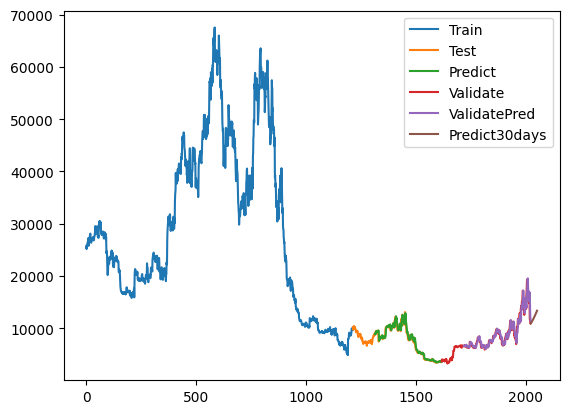

In [58]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()